In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/ratings.csv')


In [ ]:
data.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [ ]:
data.isnull().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0


In [ ]:
data.describe()

,userId,movieId,rating,timestamp
count,2.602429e+07,2.602429e+07,2.602429e+07,2.602429e+07
mean,1.350371e+05,1.584911e+04,3.528090e+00,1.171258e+09
std,7.817620e+04,3.108526e+04,1.065443e+00,2.052889e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,6.716400e+04,1.073000e+03,3.000000e+00,9.907545e+08
50%,1.351630e+05,2.583000e+03,3.500000e+00,1.151716e+09
75%,2.026930e+05,6.503000e+03,4.000000e+00,1.357578e+09
max,2.708960e+05,1.762750e+05,5.000000e+00,1.501830e+09


In [ ]:
data.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [ ]:
data['userId'].nunique()


270896

In [ ]:
data['movieId'].nunique()

45115

In [ ]:
(data['userId'].value_counts().describe())

,count
count,270896.000000
mean,96.067454
std,205.719606
min,1.000000
25%,15.000000
50%,30.000000
75%,93.000000
max,18276.000000


In [ ]:
(data.groupby('movieId')['rating'].mean())

,rating
movieId,
1,3.888157
2,3.236953
3,3.175550
4,2.875713
5,3.079565
...,...
176267,4.000000
176269,3.500000
176271,5.000000


In [ ]:
data['rating'].value_counts()

,count
rating,
4.0,6998802
3.0,5256722
5.0,3812499
3.5,3116213
4.5,2170441
2.0,1762440
2.5,1255358
1.0,843310
0.5,404897


<Axes: xlabel='rating', ylabel='Count'>

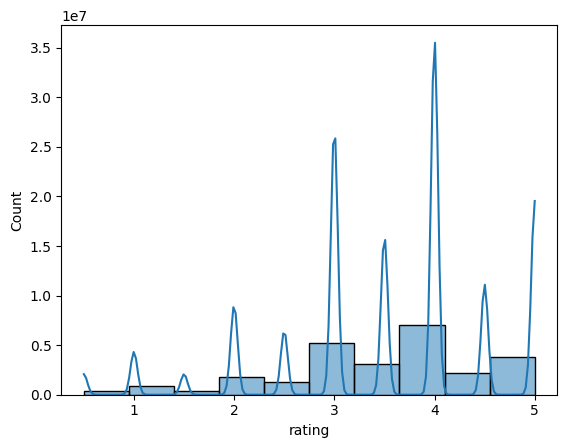

In [ ]:
sns.histplot(data['rating'], bins=10, kde=True)

In [ ]:
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')

<Axes: xlabel='timestamp'>

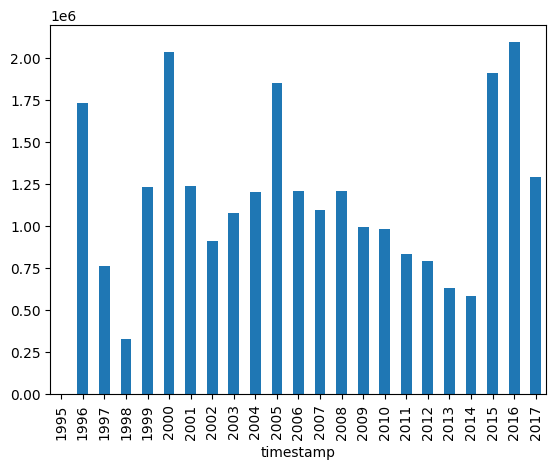

In [ ]:
data['timestamp'].dt.year.value_counts().sort_index().plot(kind='bar')

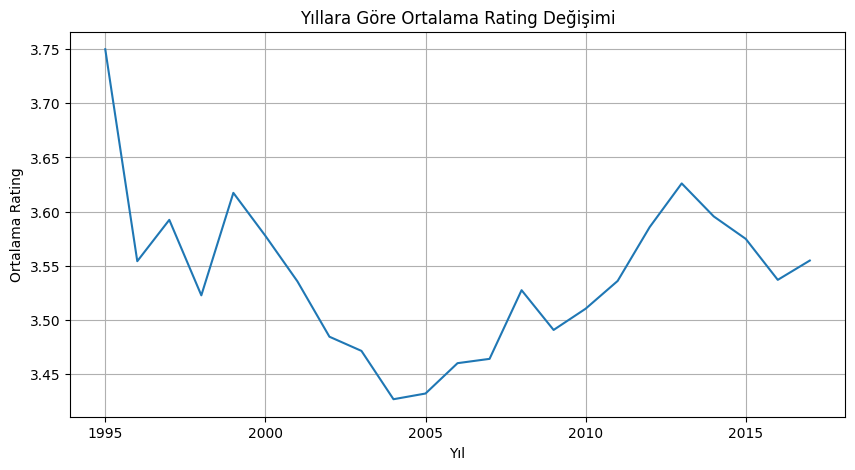

In [ ]:
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')  # Timestamp'i datetime formatına çevir
data.groupby(data['timestamp'].dt.year)['rating'].mean().plot(kind='line', figsize=(10,5))
plt.title("Yıllara Göre Ortalama Rating Değişimi")
plt.xlabel("Yıl")
plt.ylabel("Ortalama Rating")
plt.grid(True)
plt.show()


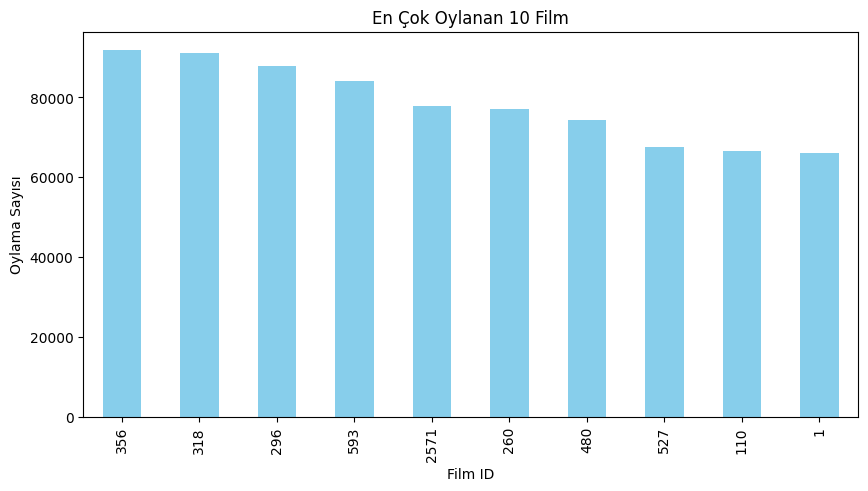

In [ ]:
top_movies = data['movieId'].value_counts().head(10)
top_movies.plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title("En Çok Oylanan 10 Film")
plt.xlabel("Film ID")
plt.ylabel("Oylama Sayısı")
plt.show()


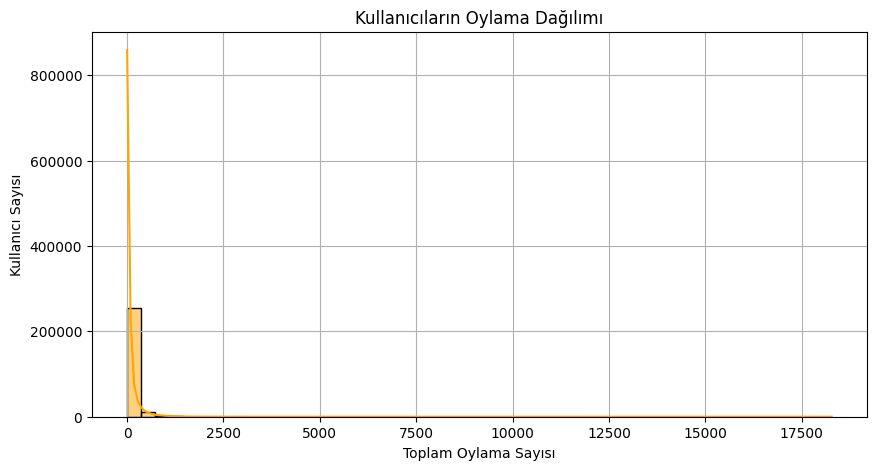

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data['userId'].value_counts(), bins=50, kde=True, color='orange')
plt.title("Kullanıcıların Oylama Dağılımı")
plt.xlabel("Toplam Oylama Sayısı")
plt.ylabel("Kullanıcı Sayısı")
plt.grid()
plt.show()


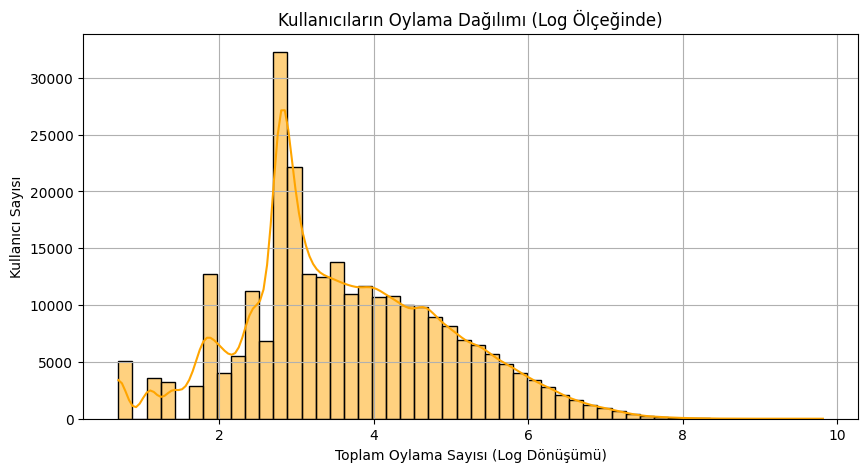

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(np.log1p(data['userId'].value_counts()), bins=50, kde=True, color='orange')
plt.title("Kullanıcıların Oylama Dağılımı (Log Ölçeğinde)")
plt.xlabel("Toplam Oylama Sayısı (Log Dönüşümü)")
plt.ylabel("Kullanıcı Sayısı")
plt.grid()
plt.show()


In [ ]:
active_users = data['userId'].value_counts()
threshold = 10  # Minimum 10 oy vermiş kullanıcılar
filtered_users = active_users[active_users >= threshold].index

filtered_data = data[data['userId'].isin(filtered_users)]
print(f"Orijinal veri seti boyutu: {data.shape}")
print(f"Filtrelenmiş veri seti boyutu: {filtered_data.shape}")


Orijinal veri seti boyutu: (26024289, 4)
Filtrelenmiş veri seti boyutu: (25847473, 4)


In [ ]:
# Minimum 50 oy almış filmler
movie_counts = data['movieId'].value_counts()
movie_threshold = 50
filtered_movies = movie_counts[movie_counts >= movie_threshold].index
filtered_data = data[data['movieId'].isin(filtered_movies)]

# Minimum 50 oy vermiş kullanıcılar
user_counts = filtered_data['userId'].value_counts()
user_threshold = 50
filtered_users = user_counts[user_counts >= user_threshold].index
filtered_data = filtered_data[filtered_data['userId'].isin(filtered_users)]

print(f"Orijinal veri seti boyutu: {data.shape}")
print(f"Yeni filtrelenmiş veri seti boyutu: {filtered_data.shape}")


Orijinal veri seti boyutu: (26024289, 4)
Yeni filtrelenmiş veri seti boyutu: (22611110, 4)


In [ ]:
print(f"Filtrelenmiş kullanıcı sayısı: {filtered_data['userId'].nunique()}")
print(f"Filtrelenmiş film sayısı: {filtered_data['movieId'].nunique()}")


Filtrelenmiş kullanıcı sayısı: 103669
Filtrelenmiş film sayısı: 12534


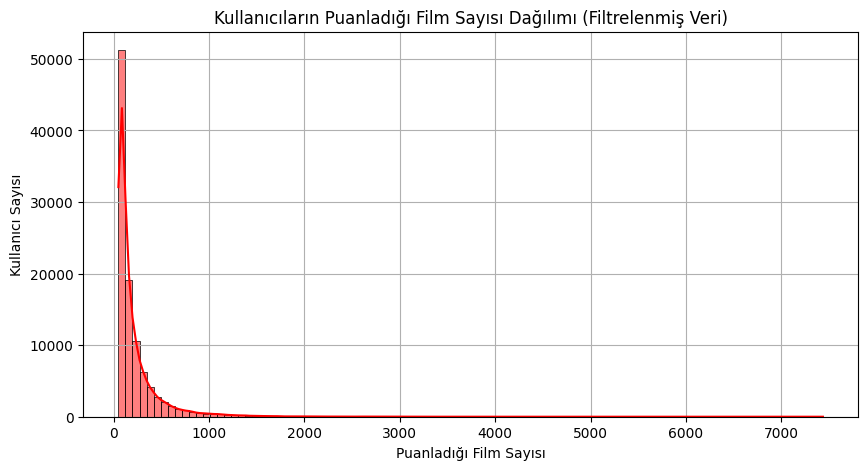

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(filtered_data['userId'].value_counts(), bins=100, kde=True, color='red')
plt.title("Kullanıcıların Puanladığı Film Sayısı Dağılımı (Filtrelenmiş Veri)")
plt.xlabel("Puanladığı Film Sayısı")
plt.ylabel("Kullanıcı Sayısı")
plt.grid()
plt.show()


In [ ]:
print(filtered_data['userId'].value_counts().describe())


count    103669.000000
mean        218.108692
std         274.941022
min          50.000000
25%          76.000000
50%         125.000000
75%         244.000000
max        7435.000000
Name: count, dtype: float64


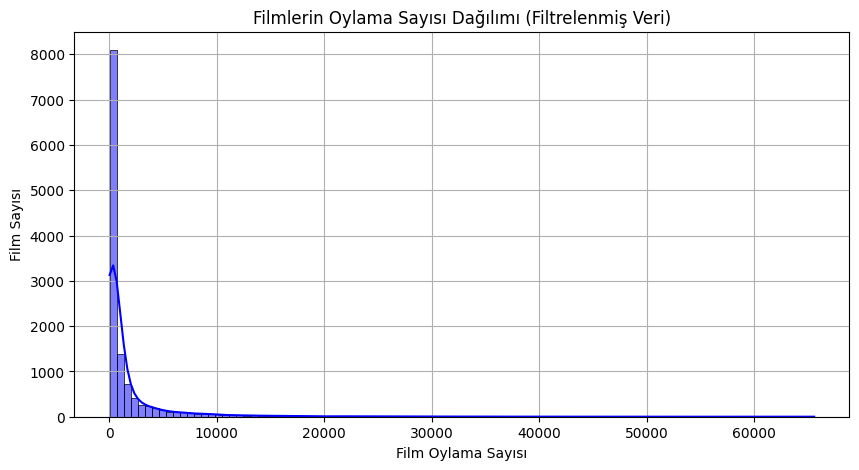

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(filtered_data['movieId'].value_counts(), bins=100, kde=True, color='blue')
plt.title("Filmlerin Oylama Sayısı Dağılımı (Filtrelenmiş Veri)")
plt.xlabel("Film Oylama Sayısı")
plt.ylabel("Film Sayısı")
plt.grid()
plt.show()


In [ ]:
print(filtered_data['movieId'].value_counts().describe())


count    12534.000000
mean      1803.981969
std       4538.113273
min         26.000000
25%        113.000000
50%        332.000000
75%       1280.750000
max      65564.000000
Name: count, dtype: float64


In [ ]:
max_threshold = 5000
filtered_users = filtered_data['userId'].value_counts()
filtered_users = filtered_users[filtered_users <= max_threshold].index
filtered_data = filtered_data[filtered_data['userId'].isin(filtered_users)]
print(f"Yeni filtrelenmiş veri seti boyutu: {filtered_data.shape}")


Yeni filtrelenmiş veri seti boyutu: (22562290, 4)


In [ ]:
min_movie_threshold = 50
filtered_movies = filtered_data['movieId'].value_counts()
filtered_movies = filtered_movies[filtered_movies >= min_movie_threshold].index
filtered_data = filtered_data[filtered_data['movieId'].isin(filtered_movies)]
print(f"Yeni filtrelenmiş veri seti boyutu: {filtered_data.shape}")

Yeni filtrelenmiş veri seti boyutu: (22546680, 4)


In [ ]:
print(f"Son filtrelenmiş kullanıcı sayısı: {filtered_data['userId'].nunique()}")
print(f"Son filtrelenmiş film sayısı: {filtered_data['movieId'].nunique()}")


Son filtrelenmiş kullanıcı sayısı: 103661
Son filtrelenmiş film sayısı: 12196


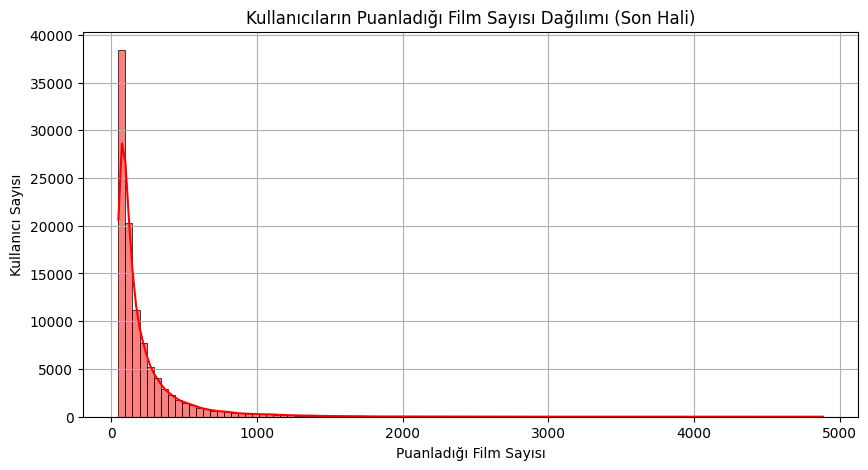

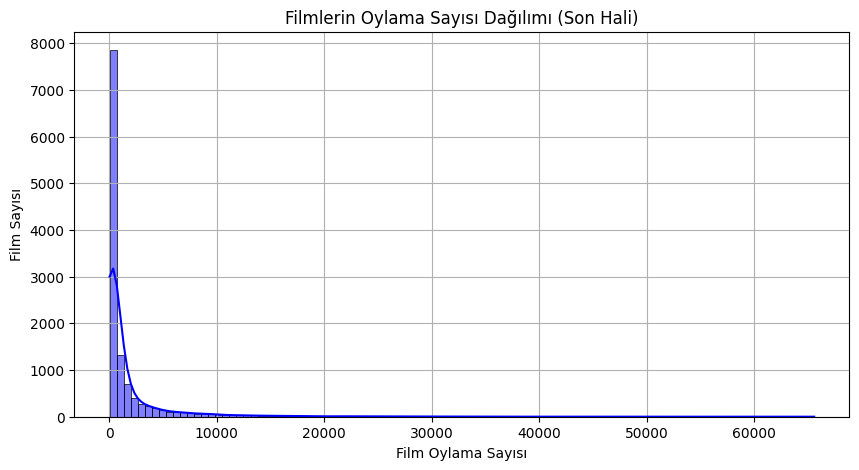

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(filtered_data['userId'].value_counts(), bins=100, kde=True, color='red')
plt.title("Kullanıcıların Puanladığı Film Sayısı Dağılımı (Son Hali)")
plt.xlabel("Puanladığı Film Sayısı")
plt.ylabel("Kullanıcı Sayısı")
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(filtered_data['movieId'].value_counts(), bins=100, kde=True, color='blue')
plt.title("Filmlerin Oylama Sayısı Dağılımı (Son Hali)")
plt.xlabel("Film Oylama Sayısı")
plt.ylabel("Film Sayısı")
plt.grid()
plt.show()


In [ ]:
from scipy.sparse import lil_matrix

# Kullanıcı ve film sayısını belirleme
num_users = filtered_data['userId'].nunique()
num_movies = filtered_data['movieId'].nunique()

# Sparse matrix'i bellek dostu bir formatta oluşturma
sparse_matrix = lil_matrix((num_users, num_movies))

# Kullanıcı ve Film ID'lerini kategori olarak kaydetme
user_mapping = {id: idx for idx, id in enumerate(filtered_data['userId'].unique())}
movie_mapping = {id: idx for idx, id in enumerate(filtered_data['movieId'].unique())}

# Veriyi iteratif olarak işleyeren matris
for row in filtered_data.itertuples():
    user_idx = user_mapping[row.userId]
    movie_idx = movie_mapping[row.movieId]
    sparse_matrix[user_idx, movie_idx] = row.rating

print("Bellek dostu Sparse Matrix oluşturuldu:", sparse_matrix.shape)



Bellek dostu Sparse Matrix oluşturuldu: (103661, 12196)


In [ ]:
from sklearn.decomposition import TruncatedSVD

# SVD ile boyut indirgeme işlemi
n_components = 300  # 300 boyuta indirme (isteğe bağlı artırılabilir)
svd = TruncatedSVD(n_components=n_components, random_state=42)
svd_matrix = svd.fit_transform(sparse_matrix)

print(f"Orijinal Matris Boyutu: {sparse_matrix.shape}")
print(f"SVD ile Küçültülmüş Matris Boyutu: {svd_matrix.shape}")


Orijinal Matris Boyutu: (103661, 12196)
SVD ile Küçültülmüş Matris Boyutu: (103661, 300)


In [ ]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=50, n_jobs=-1)

knn.fit(svd_matrix)

# Kullanıcı 5'in en yakın komşularını bulma işlemi
distances, indices = knn.kneighbors(svd_matrix[5].reshape(1, -1), n_neighbors=50)

print("Benzer Kullanıcıların İndeksleri:", indices)
print("Benzerlik Değerleri:", distances)


Benzer Kullanıcıların İndeksleri: [[     5  68242  56287  64238  84015  32616  38920   4454  21774  94340
   21594  26351  85337  57607   5308  19734  79875  95373  69269   3730
   41229  39036  97714  27194  43352  49761  57555  71871  19660  39786
   25647  10146  85932  71885  21836  89486  12652  55075  74826  61480
   40827  88995  33613  83484  76424  27432  83173 102758  70840  11189]]
Benzerlik Değerleri: [[2.22044605e-16 2.28326692e-01 2.31478215e-01 2.43512234e-01
  2.45989423e-01 2.48334370e-01 2.49375719e-01 2.49929736e-01
  2.52280423e-01 2.52705365e-01 2.53357337e-01 2.55301114e-01
  2.55988371e-01 2.56037406e-01 2.56373902e-01 2.57913275e-01
  2.59498576e-01 2.62335836e-01 2.62398533e-01 2.64263361e-01
  2.66645065e-01 2.68981279e-01 2.69185380e-01 2.71674291e-01
  2.72617886e-01 2.73307026e-01 2.74228483e-01 2.75798217e-01
  2.77991800e-01 2.81573669e-01 2.81890408e-01 2.81900706e-01
  2.82673978e-01 2.82816283e-01 2.84398420e-01 2.85117703e-01
  2.86328203e-01 2.864922

In [ ]:
# Kullanıcı 5'in benzer kullanıcılarının indekslerini alma
similar_users = indices.flatten()[1:]  # İlk eleman (kendi ID'si) hariç tutuldu

# Benzerlik skorlarının normalize edilmesi
similarity_scores = distances.flatten()[1:]
similarity_scores = similarity_scores / similarity_scores.sum()

# Benzer kullanıcıların puanlarını alma
user_movie_ratings = filtered_data[filtered_data['userId'].isin(similar_users)]

similarity_df = pd.DataFrame({'userId': similar_users, 'similarity_score': similarity_scores})

# Puanların ve benzerlik skorlarının birleştirilmesi
user_movie_ratings = user_movie_ratings.merge(similarity_df, on='userId')

# Ağırlıklı puan hesabı
user_movie_ratings['weighted_rating'] = user_movie_ratings['rating'] * user_movie_ratings['similarity_score']

# Filmleri ağırlıklı ortalama puana göre sıralama
top_movies = user_movie_ratings.groupby('movieId')['weighted_rating'].sum().sort_values(ascending=False)

# Kullanıcı 5’in izlediği filmler
watched_movies = filtered_data[filtered_data['userId'] == 5]['movieId'].values
recommended_movies = top_movies.drop(watched_movies, errors='ignore')

# En iyi 10 film önerisi
print("Kullanıcı 5 İçin Önerilen Filmler:")
print(recommended_movies.head(10))



Kullanıcı 5 İçin Önerilen Filmler:
movieId
480     0.994323
356     0.958766
318     0.919082
527     0.864714
589     0.854214
150     0.809048
110     0.786144
593     0.771150
1198    0.760061
1270    0.741387
Name: weighted_rating, dtype: float64
